In [1]:
import os
os.chdir('/Users/ken/Desktop/repos/activeSiteClustering')
from clustering import cluster, similarity, io, utils
import numpy as np
import sys
from random import seed, random
from math import floor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# similarity metric:
# 9-dimensional vector of basic chemical and morphological features
# Hand-tuned examples showed it can separate different sizes and charge distributions
# Can easily incorporate more variables in the future (e.g. charge variance)
# Comparison takes Euclidean distance between two vectors

activeSites = io.read_active_sites('data')

seed()
rand1 = int(floor(random()*len(activeSites)))
rand2 = int(floor(random()*len(activeSites)))

#Range
print('\n----------------')
print('This value will be between 0 and 1:')
print('\tSimilarity (random):',similarity.compute_similarity(activeSites[rand1],
                                                    activeSites[rand2]))

#Reflexive
print('\nThis value will be 1:')
print('\tSimilarity A <-> A:',similarity.compute_similarity(activeSites[rand1],
                                                    activeSites[rand1]))

#Symmetric
print('\nThese values will be the same:')
print('\tSimilarity A -> B:',similarity.compute_similarity(activeSites[rand1],
                                                    activeSites[rand2]))
print('\tSimilarity B -> A:',similarity.compute_similarity(activeSites[rand2],
                                                    activeSites[rand1]))

Read in 136 active sites

----------------
This value will be between 0 and 1:
	Similarity (random): 0.154078671845

This value will be 1:
	Similarity A <-> A: 1.0

These values will be the same:
	Similarity A -> B: 0.154078671845
	Similarity B -> A: 0.154078671845


In [3]:
# partitioning algorithm:
# Implemented K-Means
# Reason: straightforward, well-documented and known to converge
# downside: non-deterministic. testing required many runs of func to catch small bugs.

# hierarchical algorithm:
# agglomerative with centroid linkage
# Reason: similar to above... simple linkage calculation, intuitive implementation.
# downside: super slow compared to k-means. but being deterministic helped with debugging.

print('clustering by partition')
p_clust = cluster.cluster_by_partitioning(activeSites,num_clusters=7)
print('done')
print('-----------------------')
print('clustering by hierarchy')
h_clust = cluster.cluster_hierarchically(activeSites,num_clusters=7)
print('done')

clustering by partition
done
-----------------------
clustering by hierarchy
Number of Clusters: 130
Number of Clusters: 120
Number of Clusters: 110
Number of Clusters: 100
Number of Clusters: 90
Number of Clusters: 80
Number of Clusters: 70
Number of Clusters: 60
Number of Clusters: 50
Number of Clusters: 40
Number of Clusters: 30
Number of Clusters: 20
Number of Clusters: 10
done


In [4]:
# quality metric:
# Used average inter-object distance among clusters in clustering (low=good).
# Slight variation on what was presented in class, averaging pairwise distances
#    *within* clusters before averaging these cluster averages. This prevented
#    skewing by large clusters (common in hierarchical with my data here)
# To compare two clusterings together, I took the log ratio of the two

p_qual = []
h_qual = []
ratio = []

num_clusters = [3,5,7,10,15]

for num in num_clusters:
    print('\n')
    print('---------',num,'-----------')
    print('-----------------------')

    print('clustering by partition')
    p_clust = cluster.cluster_by_partitioning(activeSites,num_clusters=num)
    p_qual.append(cluster.quality(p_clust))
    
    print('done')
    print('-----------------------')
    print('clustering by hierarchy')

    h_clust = cluster.cluster_hierarchically(activeSites,num_clusters=num)
    h_qual.append(cluster.quality(h_clust))
    print('done')
    
    ratio.append(cluster.compare(p_clust,h_clust))



--------- 3 -----------
-----------------------
clustering by partition
done
-----------------------
clustering by hierarchy
Number of Clusters: 130
Number of Clusters: 120
Number of Clusters: 110
Number of Clusters: 100
Number of Clusters: 90
Number of Clusters: 80
Number of Clusters: 70
Number of Clusters: 60
Number of Clusters: 50
Number of Clusters: 40
Number of Clusters: 30
Number of Clusters: 20
Number of Clusters: 10
done


--------- 5 -----------
-----------------------
clustering by partition
done
-----------------------
clustering by hierarchy
Number of Clusters: 130
Number of Clusters: 120
Number of Clusters: 110
Number of Clusters: 100
Number of Clusters: 90
Number of Clusters: 80
Number of Clusters: 70
Number of Clusters: 60
Number of Clusters: 50
Number of Clusters: 40
Number of Clusters: 30
Number of Clusters: 20
Number of Clusters: 10
done


--------- 7 -----------
-----------------------
clustering by partition
done
-----------------------
clustering by hierarchy
Num

[1, 20, -1, 1]

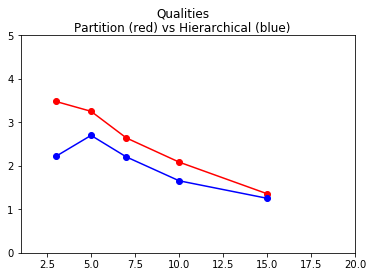

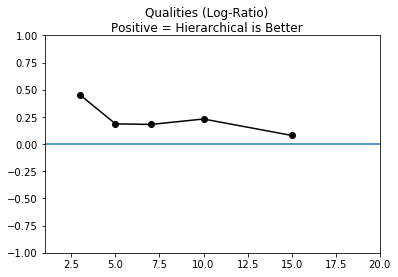

In [5]:
fig1 = plt.figure()
fig1.suptitle('Qualities\nPartition (red) vs Hierarchical (blue)')
plt.plot(num_clusters,p_qual,color="r",marker='o')
plt.plot(num_clusters,h_qual,color="b",marker='o')
plt.axis([1,20,0,5])

fig2 = plt.figure()
fig2.suptitle('Qualities (Log-Ratio)\nPositive = Hierarchical is Better')
plt.plot(num_clusters,ratio,color="k",marker='o')
plt.plot([0,21],[0,0],marker='_')
plt.axis([1,20,-1,1])

I'm unsure if my clusters had biological meaning. The fact that the hierarchical clustering consistently had more skewed distributions of cluster sizes whereas the k-means did not makes me skeptical. Of course, this is also compounded by not knowing if the 9 somewhat arbitrary parameters I chose actually translate to functionality (e.g. ligand specificity).

In all, I think the general algorithms employed here could be useful, but would require more detailed input data upon which to cluster the sites.